In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\amkum\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('macro-data.csv')
data.shape

(84, 5)

In [4]:
data.dtypes

DATE        object
PCE        float64
GDP        float64
PCE_PCH    float64
GDP_PCH    float64
dtype: object

In [5]:
data.head(data.shape[0])

,DATE,PCE,GDP,PCE_PCH,GDP_PCH
0,2002-01-01,7217.733333,10783.500,0.42343,1.15412
1,2002-04-01,7307.966667,10887.460,1.25016,0.96407
2,2002-07-01,7397.133333,10984.040,1.22013,0.88708
3,2002-10-01,7472.966667,11061.433,1.02517,0.70460
4,2003-01-01,7567.133333,11174.129,1.26010,1.01882
...,...,...,...,...,...
79,2021-10-01,16518.000000,24349.121,2.29574,3.39145
80,2022-01-01,16874.766667,24740.480,2.15987,1.60728
81,2022-04-01,17261.366667,25248.476,2.29099,2.05330
82,2022-07-01,17542.666667,25723.941,1.62965,1.88314


In [6]:
covid_data = data[((data['DATE'] >= '2020') & (data['DATE'] < '2022'))]
financial_crisis_data = data[((data.DATE >= '2008') & (data.DATE < '2010'))]
non_crises_data = data.loc[~(((data.DATE>='2008') & (data.DATE<'2010')) | ((data.DATE>='2020') & (data.DATE<'2022')))]

In [7]:
covid_data.shape[0] + financial_crisis_data.shape[0] + non_crises_data.shape[0]

84

In [8]:
non_crises_data.shape[0]

68

In [12]:
covid_data.reset_index(drop=True)

,DATE,PCE,GDP,PCE_PCH,GDP_PCH
0,2020-01-01,14440.166667,21538.032,-1.22374,-0.77626
1,2020-04-01,13049.766667,19636.731,-9.62870,-8.82764
2,2020-07-01,14388.733333,21362.428,10.26046,8.78811
3,2020-10-01,14586.066667,21704.706,1.37144,1.60224
4,2021-01-01,15131.500000,22313.850,3.73941,2.80651
5,2021-04-01,15813.533333,23046.934,4.50737,3.28533
6,2021-07-01,16147.300000,23550.420,2.11064,2.18461
7,2021-10-01,16518.000000,24349.121,2.29574,3.39145


In [13]:
financial_crisis_data.reset_index(drop=True)

,DATE,PCE,GDP,PCE_PCH,GDP_PCH
0,2008-01-01,10004.466667,14706.538,0.67759,-0.05790
1,2008-04-01,10129.900000,14865.701,1.25377,1.08226
2,2008-07-01,10159.066667,14898.999,0.28793,0.22399
3,2008-10-01,9906.933333,14608.208,-2.48186,-1.95175
4,2009-01-01,9814.966667,14430.901,-0.92831,-1.21375
5,2009-04-01,9805.500000,14381.236,-0.09645,-0.34416
6,2009-07-01,9939.400000,14448.882,1.36556,0.47038
7,2009-10-01,10005.000000,14651.248,0.66000,1.40057


# REGRESSION ON OVERALL DATA

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
overall_data = data
overall_data.head()

,DATE,PCE,GDP,PCE_PCH,GDP_PCH
0,2002-01-01,7217.733333,10783.500,0.42343,1.15412
1,2002-04-01,7307.966667,10887.460,1.25016,0.96407
2,2002-07-01,7397.133333,10984.040,1.22013,0.88708
3,2002-10-01,7472.966667,11061.433,1.02517,0.70460
4,2003-01-01,7567.133333,11174.129,1.26010,1.01882


In [16]:
overall_data['CRIS_PERIOD'] = np.zeros(overall_data.shape[0], dtype= np.int64)

In [17]:
overall_data[((data.DATE>='2008') & (data.DATE<='2009')) | ((data.DATE>='2020') & (data.DATE<='2021'))] = 1

In [18]:
overall_data.columns

Index(['DATE', 'PCE', 'GDP', 'PCE_PCH', 'GDP_PCH', 'CRIS_PERIOD'], dtype='object')

In [19]:
X = overall_data[['PCE_PCH', 'CRIS_PERIOD']]
y = overall_data['GDP_PCH']

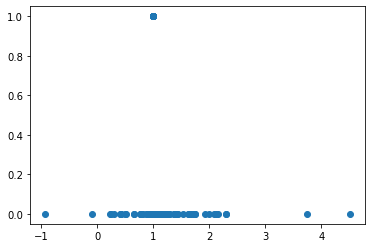

In [435]:
plt.scatter(X['PCE_PCH'], X['CRIS_PERIOD'])
plt.show()

In [436]:
reg_model = LinearRegression().fit(X, y)
reg_model.coef_

array([ 0.77335367, -0.03968569])

In [437]:
reg_model.intercept_

0.26633201358973624

GDP_PCH = 0.77*PCE_PCH - 0.039*CRIS_PERIOD + 0.266

In [438]:
X = overall_data[['GDP_PCH', 'CRIS_PERIOD']]
y = overall_data['PCE_PCH']

reg_model_rev = LinearRegression().fit(X,y)
reg_model_rev.coef_

array([ 0.84757782, -0.0374257 ])

In [439]:
reg_model_rev.intercept_

0.18984787165045713

PCE_PCH = 0.84*GDP_PCH - 0.037*CRIS_PERIOD + 0.189

## REGRESSION ON NON-CRISES DATA

In [440]:
non_crises_data = non_crises_data.reset_index(drop=True)

In [48]:
non_crises_data.head(10)

,DATE,PCE,GDP,PCE_PCH,GDP_PCH
0,1,7217.733333,10783.500,0.42343,1.15412
1,2,7307.966667,10887.460,1.25016,0.96407
2,3,7397.133333,10984.040,1.22013,0.88708
3,4,7472.966667,11061.433,1.02517,0.70460
4,1,7567.133333,11174.129,1.26010,1.01882
5,2,7661.466667,11312.766,1.24662,1.24070
6,3,7820.933333,11566.669,2.08141,2.24439
7,4,7913.466667,11772.234,1.18315,1.77722
8,1,8048.766667,11923.447,1.70974,1.28449
9,2,8147.100000,12112.815,1.22172,1.58820


In [441]:
for i in range(non_crises_data.shape[0]):
    month = non_crises_data.loc[i, 'DATE'][5:7]
    quarter = 1
    if   (month == '01'):
        quarter = 1
    elif (month == '04'):
        quarter = 2
    elif (month == '07'):
        quarter = 3
    else:
        quarter = 4
    non_crises_data.loc[i,'DATE'] = quarter

In [442]:
# non_crises_data

In [443]:
X = non_crises_data[['GDP_PCH']]
y = non_crises_data['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_

array([0.63605114])

In [444]:
reg_model.intercept_

0.40696096755737776

# REGRESSION ON COVID PERIOD

In [445]:
covid_data = covid_data.reset_index(drop=True)

In [446]:
for i in range(covid_data.shape[0]):
    month = covid_data.loc[i, 'DATE'][5:7]
    quarter = 1
    if   (month == '01'):
        quarter = 1
    elif (month == '04'):
        quarter = 2
    elif (month == '07'):
        quarter = 3
    else:
        quarter = 4
    covid_data.loc[i,'DATE'] = quarter

In [447]:
covid_data.head()

,DATE,PCE,GDP,PCE_PCH,GDP_PCH
0,1,14440.166667,21538.032,-1.22374,-0.77626
1,2,13049.766667,19636.731,-9.62870,-8.82764
2,3,14388.733333,21362.428,10.26046,8.78811
3,4,14586.066667,21704.706,1.37144,1.60224
4,1,15131.500000,22313.850,3.73941,2.80651


In [448]:
X = covid_data[['GDP_PCH']]
y = covid_data['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_

array([1.12203928])

In [449]:
reg_model.intercept_

-0.0677062391858203

# QUARTER WISE ANALYSIS

In [450]:
non_crises_data.head()

,DATE,PCE,GDP,PCE_PCH,GDP_PCH
0,1,7217.733333,10783.500,0.42343,1.15412
1,2,7307.966667,10887.460,1.25016,0.96407
2,3,7397.133333,10984.040,1.22013,0.88708
3,4,7472.966667,11061.433,1.02517,0.70460
4,1,7567.133333,11174.129,1.26010,1.01882


In [451]:
q1_data = non_crises_data[non_crises_data.DATE == 1]
q2_data = non_crises_data[non_crises_data.DATE == 2]
q3_data = non_crises_data[non_crises_data.DATE == 3]
q4_data = non_crises_data[non_crises_data.DATE == 4]

In [452]:
X = q1_data[['GDP_PCH']]
y = q1_data['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_, reg_model.intercept_

(array([0.47775723]), 0.6127399053210343)

In [453]:
X = q2_data[['GDP_PCH']]
y = q2_data['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_, reg_model.intercept_

(array([0.93414546]), 0.009390058277763513)

In [454]:
X = q3_data[['GDP_PCH']]
y = q3_data['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_, reg_model.intercept_

(array([0.72778965]), 0.31600338456697874)

In [455]:
X = q4_data[['GDP_PCH']]
y = q4_data['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_, reg_model.intercept_

(array([0.54705164]), 0.4779154855703125)

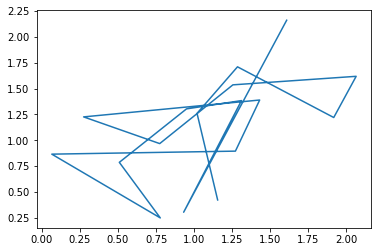

In [456]:
plt.plot(q1_data['GDP_PCH'], q1_data['PCE_PCH'])
plt.show()

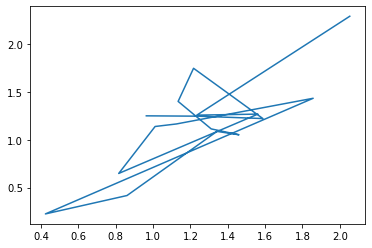

In [457]:
plt.plot('GDP_PCH', 'PCE_PCH', data = q2_data)
plt.show()

In [458]:
financial_crisis_data = financial_crisis_data.reset_index(drop=True)

In [459]:
for i in range(financial_crisis_data.shape[0]):
    month = financial_crisis_data.loc[i, 'DATE'][5:7]
    quarter = 1
    if   (month == '01'):
        quarter = 1
    elif (month == '04'):
        quarter = 2
    elif (month == '07'):
        quarter = 3
    else:
        quarter = 4
    financial_crisis_data.loc[i,'DATE'] = quarter

In [468]:
financial_crisis_data.head()

,DATE,PCE,GDP,PCE_PCH,GDP_PCH
0,1,10004.466667,14706.538,0.67759,-0.05790
1,2,10129.900000,14865.701,1.25377,1.08226
2,3,10159.066667,14898.999,0.28793,0.22399
3,4,9906.933333,14608.208,-2.48186,-1.95175
4,1,9814.966667,14430.901,-0.92831,-1.21375


In [469]:
q1_data_cris = financial_crisis_data[financial_crisis_data.DATE == 1]
q2_data_cris = financial_crisis_data[financial_crisis_data.DATE == 2]
q3_data_cris = financial_crisis_data[financial_crisis_data.DATE == 3]
q4_data_cris = financial_crisis_data[financial_crisis_data.DATE == 4]

In [470]:
X = q1_data_cris[['GDP_PCH']]
y = q1_data_cris['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_, reg_model.intercept_

(array([1.38936713]), 0.7580343569667347)

In [464]:
X = q2_data_cris[['GDP_PCH']]
y = q2_data_cris['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_, reg_model.intercept_

(array([0.94657955]), 0.22932481751517803)

In [465]:
X = q3_data_cris[['GDP_PCH']]
y = q3_data_cris['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_, reg_model.intercept_

(array([4.37367588]), -0.6917296602946545)

In [466]:
X = q4_data_cris[['GDP_PCH']]
y = q4_data_cris['PCE_PCH']

reg_model = LinearRegression().fit(X,y)
reg_model.coef_, reg_model.intercept_

(array([0.9372196]), -0.6526416512146812)

In [20]:
data.head()

,DATE,PCE,GDP,PCE_PCH,GDP_PCH,CRIS_PERIOD
0,2002-01-01,7217.733333,10783.500,0.42343,1.15412,0
1,2002-04-01,7307.966667,10887.460,1.25016,0.96407,0
2,2002-07-01,7397.133333,10984.040,1.22013,0.88708,0
3,2002-10-01,7472.966667,11061.433,1.02517,0.70460,0
4,2003-01-01,7567.133333,11174.129,1.26010,1.01882,0


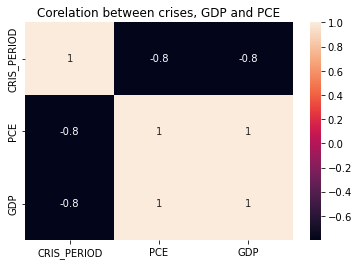

In [27]:
sns.heatmap(data[['CRIS_PERIOD', 'PCE', 'GDP']].corr(), annot = True)
plt.title("Corelation between crises, GDP and PCE")
plt.show()